<a href="https://colab.research.google.com/github/ykitaguchi77/statistics_for_articles/blob/main/Blepharoptosis_SPK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**眼瞼下垂SPK解析**

In [11]:
# prompt: google driveをマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**データの確認**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

xlsx_path = "/content/drive/Shareddrives/岩崎Dr_IgG4 deulk/眼瞼下垂/ドライアイ/眼瞼下垂iwasaki.xlsx"

In [ ]:
excel_data = pd.ExcelFile(xlsx_path)

# Display sheet names to understand the structure of the file
excel_data.sheet_names

# Load the content of the 'all' sheet to examine its structure and data
all_data = pd.read_excel(xlsx_path, sheet_name='all', header=0)

# Display the first few rows of the 'all' sheet to understand its content
all_data.head()

In [ ]:
# Filter rows where both 'BUT pre' and 'BUT post' are non-missing, while keeping all columns
valid_but_rows_full = all_data.dropna(subset=['BUT pre', 'BUT post', 'levator_function pre'])

# 行数をカウント
valid_but_count = valid_but_rows_full.shape[0]

# 結果を出力
print(f"'BUT pre' と 'BUT post' が揃っている行数: {valid_but_count}")

valid_but_rows_full

In [ ]:
# Re-attempt filtering rows with valid 'SPK pre' and 'SPK post'
valid_spk_data = valid_but_rows_full[['SPK pre', 'SPK post']].dropna()

# Create a contingency table (matrix) for 'SPK pre' and 'SPK post'
spk_matrix = pd.crosstab(valid_spk_data['SPK pre'], valid_spk_data['SPK post'])

# Plot the matrix as a heatmap
plt.figure(figsize=(6, 5))
plt.imshow(spk_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar(label='Number of Cases')
plt.xticks(range(len(spk_matrix.columns)), spk_matrix.columns, fontsize=10)
plt.yticks(range(len(spk_matrix.index)), spk_matrix.index, fontsize=10)
plt.xlabel('SPK post', fontsize=12)
plt.ylabel('SPK pre', fontsize=12)
plt.title('SPK pre vs SPK post (Number of Cases)', fontsize=14)

# Annotate matrix values
for i in range(len(spk_matrix.index)):
    for j in range(len(spk_matrix.columns)):
        plt.text(
            j, i, spk_matrix.iloc[i, j],
            ha='center', va='center', color='black', fontsize=10
        )

plt.tight_layout()
plt.show()


In [30]:
# SPK pre列を数値型に変換（必要に応じてエラーをNaNにする）
valid_but_rows_full['SPK pre'] = pd.to_numeric(valid_but_rows_full['SPK pre'], errors='coerce')

# ΔMRD-1およびΔMRD-2を計算
valid_but_rows_full.loc[:, 'ΔMRD-1'] = valid_but_rows_full['MRD-1 3M'] - valid_but_rows_full['MRD-1 pre']
valid_but_rows_full.loc[:, 'ΔMRD-2'] = valid_but_rows_full['MRD-2 3M'] - valid_but_rows_full['MRD-2 pre']

# 'levator_function post'を関連列から除外
adjusted_relevant_columns = [
    'MRD-1 pre', 'MRD-1 3M', 'ΔMRD-1',
    'MRD-2 pre', 'MRD-2 3M', 'ΔMRD-2',
    'levator_function pre', 'SPK pre', 'SPK post', 'BUT pre', 'BUT post'
]

# 調整した関連列のNaNを削除
adjusted_valid_data = valid_but_rows_full[adjusted_relevant_columns].dropna()

# 調整後のデータの記述統計量を計算
adjusted_statistics = adjusted_valid_data.describe()

# 各列の欠損値の数を計算
adjusted_missing_values = valid_but_rows_full[adjusted_relevant_columns].isna().sum()

# 統計量と欠損値を結合
adjusted_statistics_with_missing = pd.concat(
    [adjusted_statistics, adjusted_missing_values.rename('Missing Values').to_frame().T]
)

# 結果を出力
adjusted_statistics_with_missing


,MRD-1 pre,MRD-1 3M,ΔMRD-1,MRD-2 pre,MRD-2 3M,ΔMRD-2,levator_function pre,SPK pre,SPK post,BUT pre,BUT post
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,0.301136,3.153409,2.852273,4.755682,4.829545,0.073864,9.636364,0.397727,0.477273,4.170455,4.840909
std,1.401025,0.947950,1.381651,0.874263,0.677582,0.494451,2.254915,0.492233,0.502346,2.506184,2.420631
min,-4.000000,1.000000,0.000000,2.500000,3.500000,-1.000000,5.000000,0.000000,0.000000,2.000000,2.000000
25%,-0.500000,2.875000,2.000000,4.000000,4.500000,0.000000,8.000000,0.000000,0.000000,3.000000,3.000000
50%,0.500000,3.000000,2.500000,5.000000,5.000000,0.000000,9.000000,0.000000,0.000000,3.000000,4.000000
75%,1.000000,4.000000,3.125000,5.500000,5.000000,0.500000,11.000000,1.000000,1.000000,5.000000,6.250000
max,3.000000,5.000000,7.500000,7.000000,6.500000,2.000000,15.000000,1.000000,1.000000,10.000000,10.000000
Missing Values,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#**クリーニングデータの解析**

1. 前後のSPKが揃っている

2. 他の値に欠損がない

In [39]:
import pandas as pd

# Load the Excel file and the specific sheet
xlsx_path = "/content/drive/Shareddrives/岩崎Dr_IgG4 deulk/眼瞼下垂/ドライアイ/眼瞼下垂iwasaki.xlsx"
excel_data = pd.ExcelFile(xlsx_path)
all_data = pd.read_excel(xlsx_path, sheet_name='all', header=0)

# Filter rows with non-missing 'BUT pre', 'BUT post', and 'levator_function pre'
valid_but_rows_full = all_data.dropna(subset=['BUT pre', 'BUT post', 'levator_function pre']).copy()

# Calculate ΔMRD-1 and ΔMRD-2
valid_but_rows_full.loc[:, 'ΔMRD-1'] = valid_but_rows_full['MRD-1 3M'] - valid_but_rows_full['MRD-1 pre']
valid_but_rows_full.loc[:, 'ΔMRD-2'] = valid_but_rows_full['MRD-2 3M'] - valid_but_rows_full['MRD-2 pre']

# Define relevant columns
relevant_columns = [
    'MRD-1 pre', 'MRD-1 3M', 'ΔMRD-1',
    'MRD-2 pre', 'MRD-2 3M', 'ΔMRD-2',
    'levator_function pre', 'SPK pre', 'SPK post', 'BUT pre', 'BUT post'
]

# Strict filtering: Drop rows with missing values across all relevant columns and reindex
cleaned_data = valid_but_rows_full[relevant_columns].dropna(how='any').reset_index(drop=True)

# Display the cleaned data
cleaned_data

,MRD-1 pre,MRD-1 3M,ΔMRD-1,MRD-2 pre,MRD-2 3M,ΔMRD-2,levator_function pre,SPK pre,SPK post,BUT pre,BUT post
0,-0.5,2.0,2.5,4.5,4.5,0.0,9.0,0,0.0,10.0,10.0
1,0.5,2.0,1.5,4.5,4.5,0.0,9.0,0,0.0,10.0,10.0
2,1.0,4.0,3.0,7.0,6.5,-0.5,11.0,1,1.0,3.0,3.0
3,-1.0,4.0,5.0,4.5,4.0,-0.5,9.0,0,0.0,3.0,3.0
4,0.5,3.0,2.5,5.0,5.0,0.0,9.0,0,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
83,0.5,4.0,3.5,4.0,4.0,0.0,10.0,0,0.0,2.0,7.0
84,0.5,4.0,3.5,4.0,4.0,0.0,10.0,0,0.0,2.0,10.0
85,0.5,4.5,4.0,4.5,4.5,0.0,11.0,1,1.0,3.0,4.0
86,0.5,4.5,4.0,4.5,4.5,0.0,11.0,1,0.0,3.0,4.0


In [44]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Filter the data where SPK pre == 0
filtered_data = cleaned_data[cleaned_data['SPK pre'] == 0]

# Separate groups by SPK post values (0 and 1)
group_0 = filtered_data[filtered_data['SPK post'] == 0]
group_1 = filtered_data[filtered_data['SPK post'] == 1]

# List of numerical variables to compare
numerical_vars = ['MRD-1 pre', 'MRD-1 3M', 'ΔMRD-1', 'MRD-2 pre', 'MRD-2 3M',
                  'ΔMRD-2', 'levator_function pre', 'BUT pre', 'BUT post']

# Initialize results dictionary
results = []

# Perform statistical tests for each variable
for var in numerical_vars:
    # Check normality for both groups
    normality_0 = shapiro(group_0[var])[1] > 0.05
    normality_1 = shapiro(group_1[var])[1] > 0.05

    if normality_0 and normality_1:
        # Check variance equality
        equal_var = levene(group_0[var], group_1[var])[1] > 0.05
        # Perform t-test
        stat, p_value = ttest_ind(group_0[var], group_1[var], equal_var=equal_var)
        test_used = "t-test"
    else:
        # Perform Mann-Whitney U test
        stat, p_value = mannwhitneyu(group_0[var], group_1[var])
        test_used = "Mann-Whitney U"

    results.append({
        "Variable": var,
        "Test Used": test_used,
        "Statistic": stat,
        "P-Value": p_value,
        "SPK- (Group 0)": normality_0,
        "SPK+ (Group 1)": normality_1
    })

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results)

results_df

,Variable,Test Used,Statistic,P-Value,SPK- (Group 0),SPK+ (Group 1)
0,MRD-1 pre,Mann-Whitney U,343.500000,0.243779,False,True
1,MRD-1 3M,Mann-Whitney U,266.500000,0.715852,False,True
2,ΔMRD-1,Mann-Whitney U,179.000000,0.034962,False,False
3,MRD-2 pre,Mann-Whitney U,182.000000,0.036937,False,True
4,MRD-2 3M,Mann-Whitney U,190.500000,0.052156,False,False
5,ΔMRD-2,Mann-Whitney U,350.000000,0.159407,False,True
6,levator_function pre,t-test,2.272707,0.027289,True,True
7,BUT pre,Mann-Whitney U,364.500000,0.109765,False,False
8,BUT post,Mann-Whitney U,422.000000,0.006135,False,False


In [45]:
import numpy as np
from scipy.stats import t

# Add confidence interval calculation to results
detailed_results = []

for result in results:
    var = result['Variable']
    group_0_values = group_0[var].dropna()
    group_1_values = group_1[var].dropna()

    if result["Test Used"] == "t-test":
        # Calculate means and standard errors
        mean_0 = np.mean(group_0_values)
        mean_1 = np.mean(group_1_values)
        se_0 = np.std(group_0_values, ddof=1) / np.sqrt(len(group_0_values))
        se_1 = np.std(group_1_values, ddof=1) / np.sqrt(len(group_1_values))

        # Calculate confidence intervals
        df = len(group_0_values) + len(group_1_values) - 2
        t_value = t.ppf(0.975, df)
        ci_0 = (mean_0 - t_value * se_0, mean_0 + t_value * se_0)
        ci_1 = (mean_1 - t_value * se_1, mean_1 + t_value * se_1)
    else:
        # For Mann-Whitney U test, report medians and IQRs
        mean_0 = np.median(group_0_values)
        mean_1 = np.median(group_1_values)
        ci_0 = (np.percentile(group_0_values, 25), np.percentile(group_0_values, 75))
        ci_1 = (np.percentile(group_1_values, 25), np.percentile(group_1_values, 75))

    detailed_results.append({
        "Variable": var,
        "Test Used": result["Test Used"],
        "Statistic": result["Statistic"],
        "P-Value": result["P-Value"],
        "SPK- (Group 0) Mean/Median": mean_0,
        "SPK+ (Group 1) Mean/Median": mean_1,
        "SPK- (Group 0) CI (95%)": ci_0,
        "SPK+ (Group 1) CI (95%)": ci_1
    })

# Convert to DataFrame for display
detailed_results_df = pd.DataFrame(detailed_results)

detailed_results_df

,Variable,Test Used,Statistic,P-Value,SPK- (Group 0) Mean/Median,SPK+ (Group 1) Mean/Median,SPK- (Group 0) CI (95%),SPK+ (Group 1) CI (95%)
0,MRD-1 pre,Mann-Whitney U,343.500000,0.243779,0.750000,0.500000,"(0.5, 1.5)","(-0.5, 1.0)"
1,MRD-1 3M,Mann-Whitney U,266.500000,0.715852,3.250000,3.000000,"(2.625, 4.0)","(3.0, 4.0)"
2,ΔMRD-1,Mann-Whitney U,179.000000,0.034962,2.250000,3.000000,"(2.0, 3.0)","(2.5, 3.5)"
3,MRD-2 pre,Mann-Whitney U,182.000000,0.036937,5.000000,5.000000,"(4.5, 5.0)","(5.0, 5.75)"
4,MRD-2 3M,Mann-Whitney U,190.500000,0.052156,5.000000,5.000000,"(4.5, 5.0)","(5.0, 5.5)"
5,ΔMRD-2,Mann-Whitney U,350.000000,0.159407,0.000000,0.000000,"(0.0, 0.0)","(-0.5, 0.0)"
6,levator_function pre,t-test,2.272707,0.027289,10.026316,8.666667,"(9.404294044886305, 10.648337534061065)","(7.581710199505652, 9.75162313382768)"
7,BUT pre,Mann-Whitney U,364.500000,0.109765,4.000000,3.000000,"(3.0, 7.5)","(3.0, 4.0)"
8,BUT post,Mann-Whitney U,422.000000,0.006135,6.000000,4.000000,"(4.0, 8.0)","(3.0, 4.0)"


<ipython-input-50-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


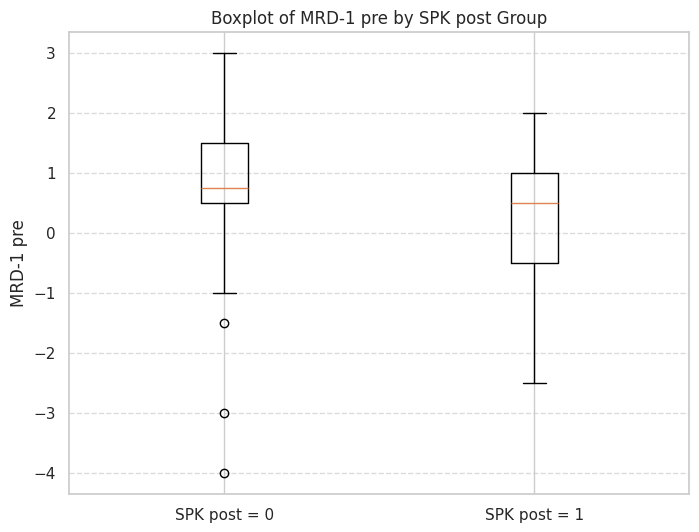

<ipython-input-50-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


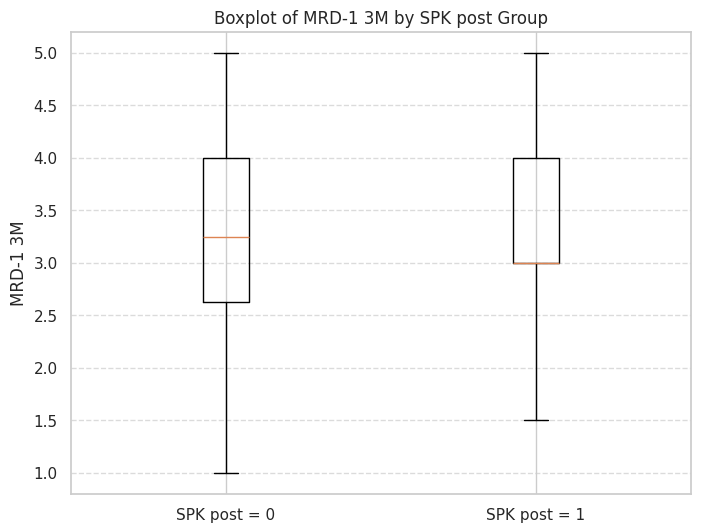

<ipython-input-50-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


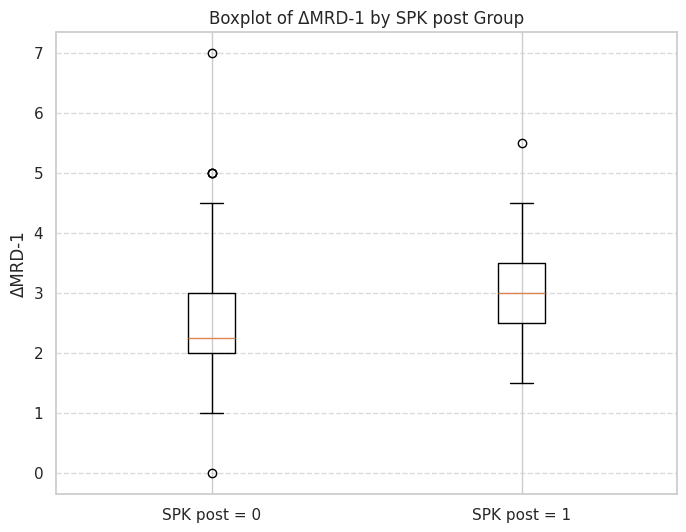

<ipython-input-50-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


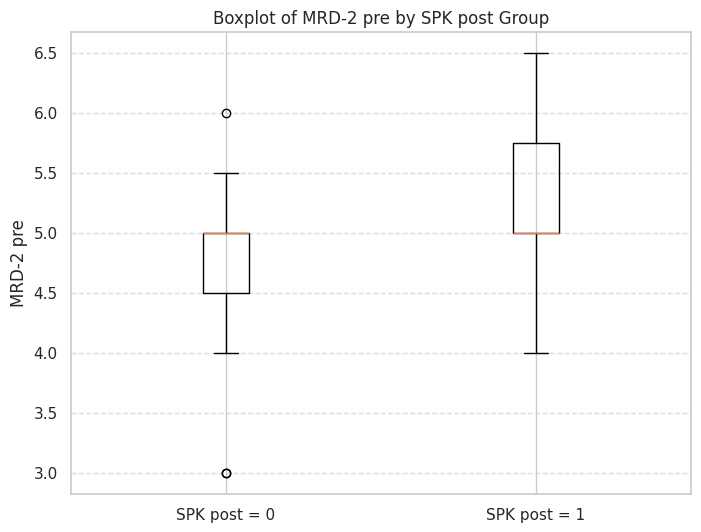

<ipython-input-50-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


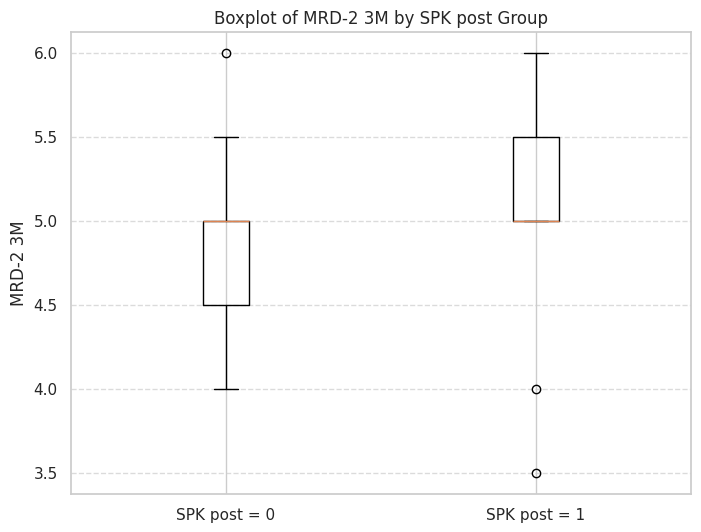

<ipython-input-50-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


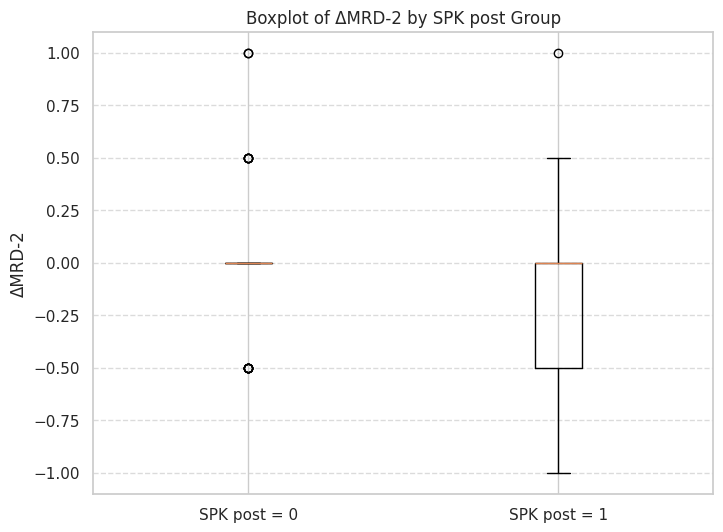

<ipython-input-50-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


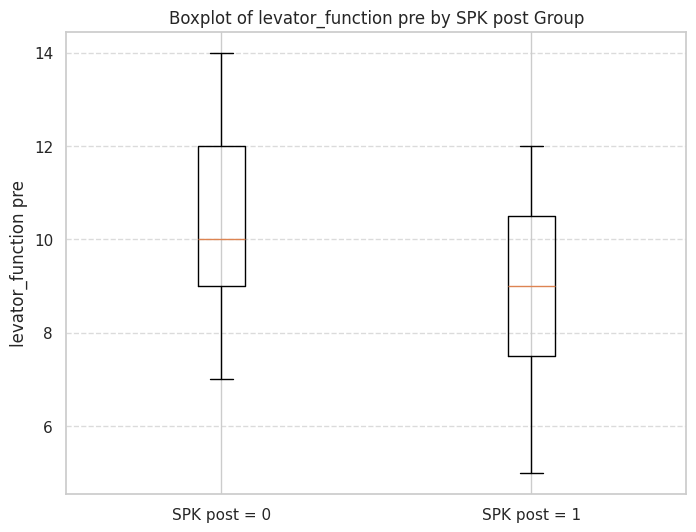

<ipython-input-50-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


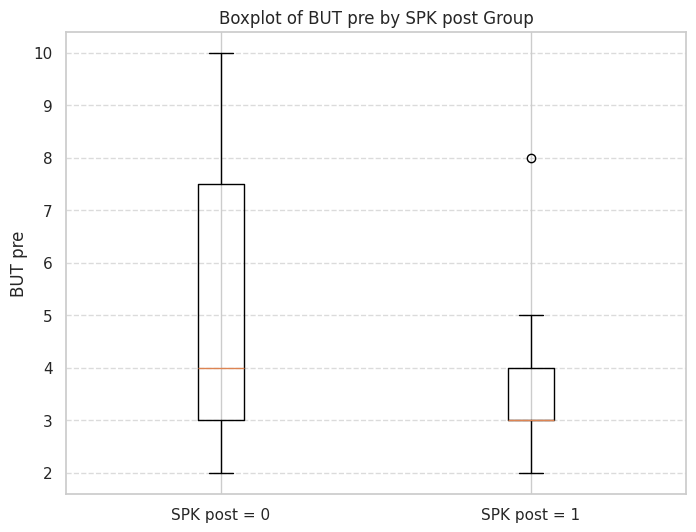

<ipython-input-50-9b1c30fd309d>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])


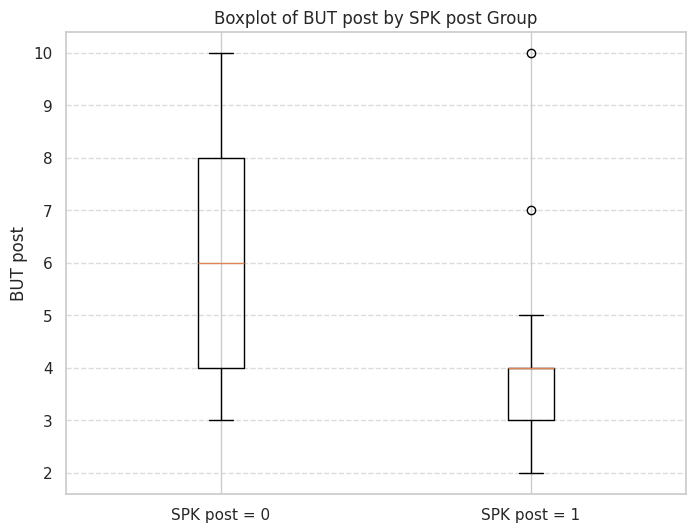

In [50]:
import matplotlib.pyplot as plt

# Create boxplots for each variable with Group 0 and Group 1
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    data_to_plot = [group_0[var].dropna(), group_1[var].dropna()]
    plt.boxplot(data_to_plot, labels=['SPK post = 0', 'SPK post = 1'])
    plt.title(f"Boxplot of {var} by SPK post Group")
    plt.ylabel(var)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


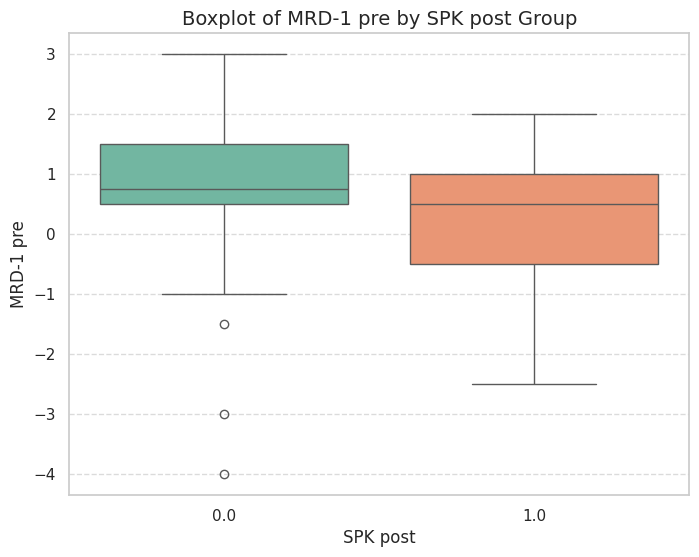

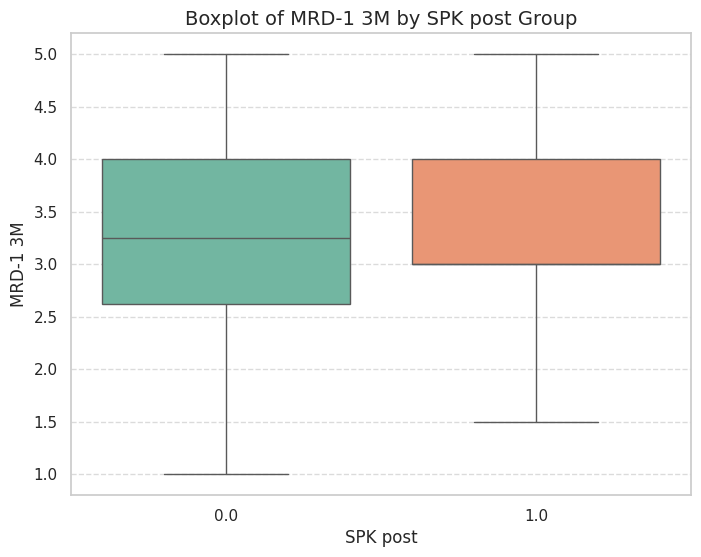

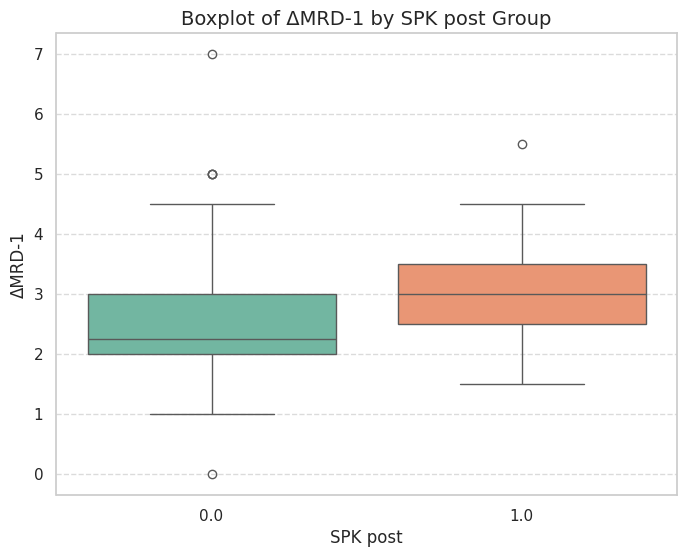

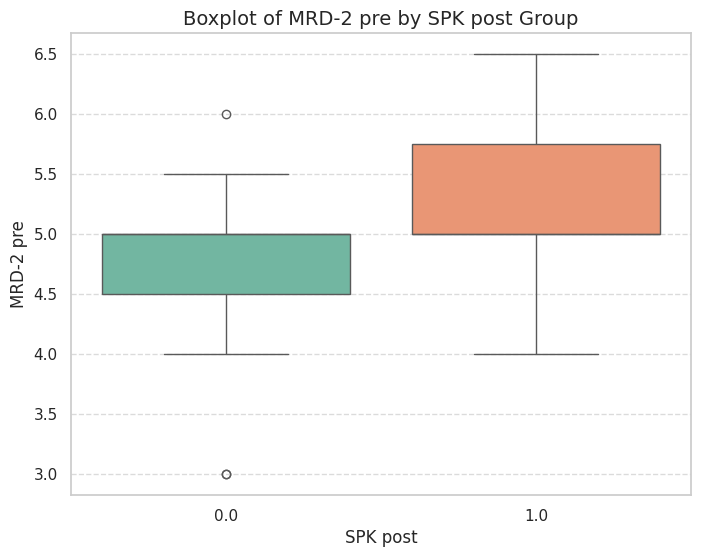

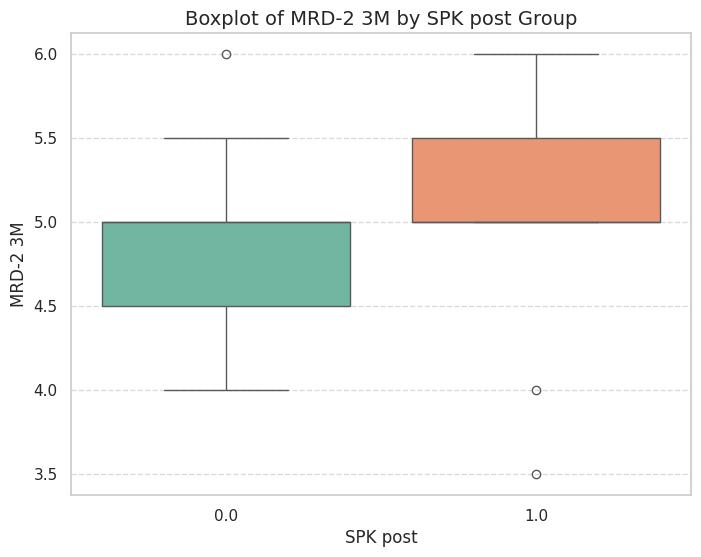

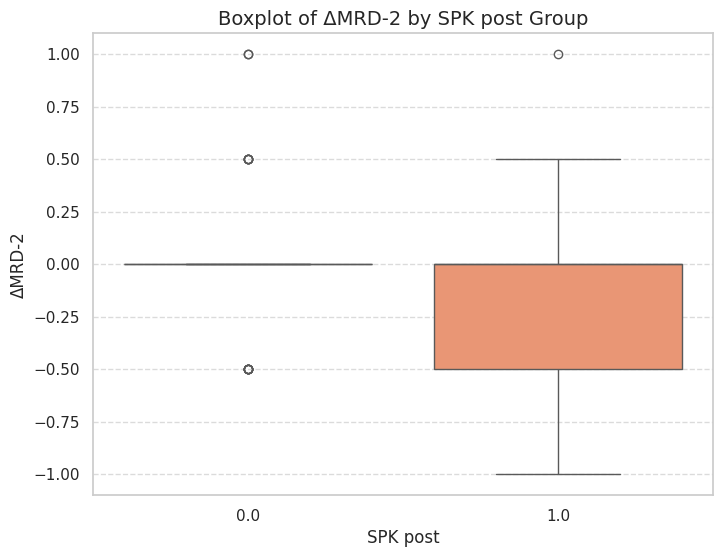

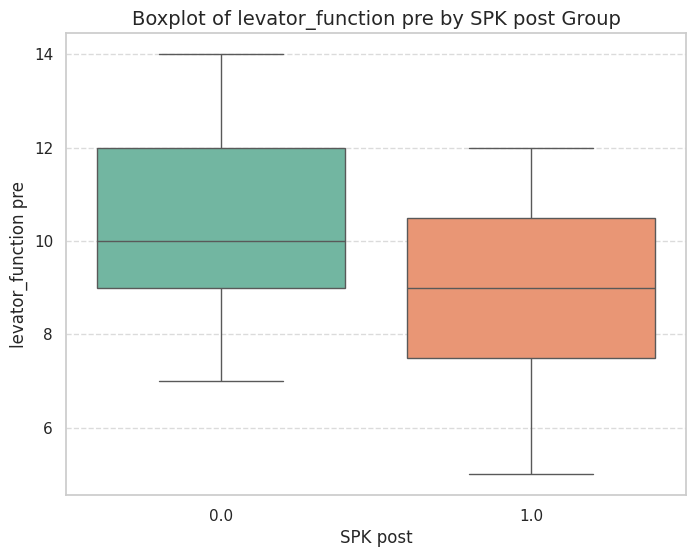

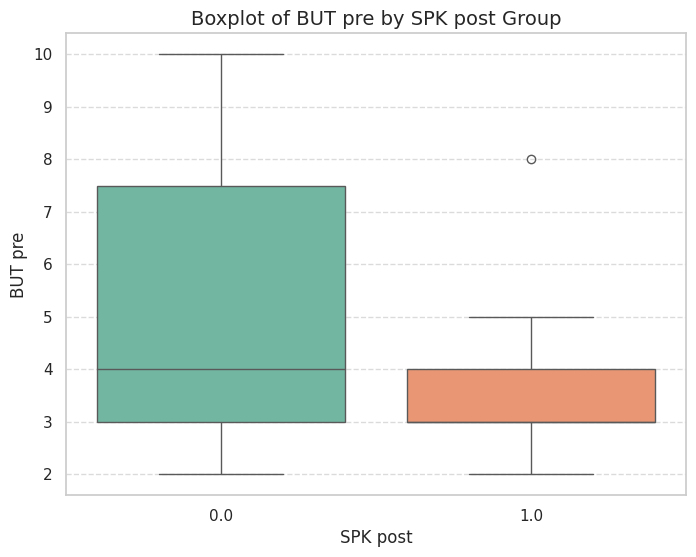

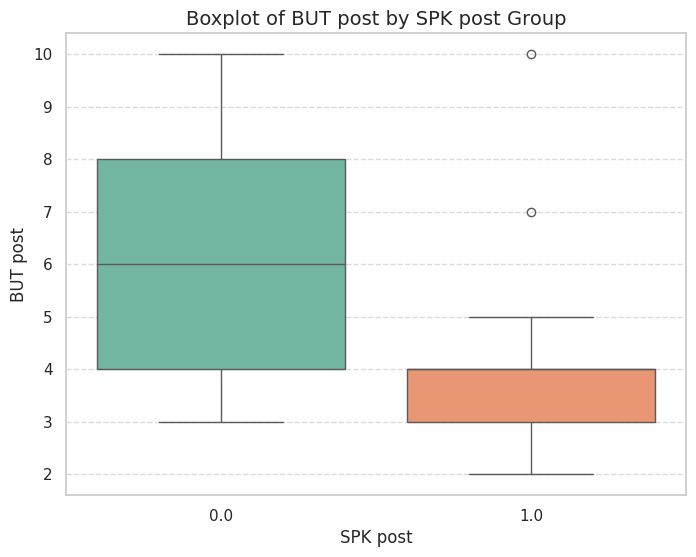

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 各変数についてのBoxplot作成
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='SPK post', y=var, data=filtered_data, palette="Set2", hue='SPK post', dodge=False)
    plt.title(f"Boxplot of {var} by SPK post Group", fontsize=14)
    plt.xlabel("SPK post", fontsize=12)
    plt.ylabel(var, fontsize=12)
    plt.legend([], [], frameon=False)  # hueラベルを非表示にする
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()